In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Lets start by defining a so called perceptron Machine Learning (ML) classifier, you can find more info at https://en.wikipedia.org/wiki/Perceptron
This exists in most ML software packages, but it is good to run throught the defining code.

In essence we're trying to find a simple criteria for the separation of our classification.

In [56]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
           self.w_ = np.zeros(1 + X.shape[1])
           self.errors_ = []
           for _ in range(self.n_iter):
               errors = 0
               for xi, target in zip(X, y):
                   update = self.eta * (target - self.predict(xi))
                   self.w_[1:] += update * xi
                   self.w_[0] += update
                   errors += int(update != 0.0)
               self.errors_.append(errors)
           return self
    def net_input(self, X):
           """Calculate net input"""
           return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
           """Return class label after unit step"""
           return np.where(self.net_input(X) >= 0.0, 1, -1)


Next, download the CSV file with the iris data

In [57]:

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
#df= pd.read_csv('iris.data',header=None)

Lets look at the end few lines with .tail() or we could look at the start .head()

In [58]:
df.tail()
# Sepal length, sepal width, petal length, petal width

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Extract the flower information for the first 100 entries, i.e the 4th column from above.

In [59]:
y = df.iloc[0:100, 4].values

Convert the values of Iris-setosa to 1, otherwise (Iris-virginica) to -1 
since the ML algorithm requires numerical values.

In [60]:
y = np.where(y == 'Iris-setosa', -1, 1)

Extract the first 100 values from column 0 and 2.

In [61]:
X = df.iloc[0:100, [0, 2]].values

Plot the data, using different colors and markers depending on the label.

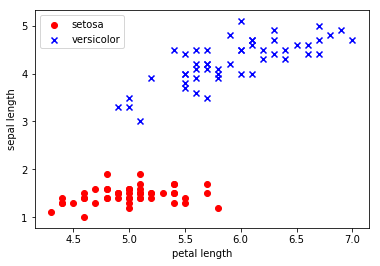

In [62]:
plt.scatter(X[:50, 0], X[:50, 1],
...             color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
...             color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

Initiate the perceptron algorithm with initial values.

In [63]:
ppn = Perceptron(eta=0.1, n_iter=10)

Use the X, column 0 and 2 of the data and y the classification to train our algorithm.

In [64]:
ppn.fit(X, y)

Plot the error in the model, The number of misclassifications, as a function of epocs, 
itirations of training in our Perceptron

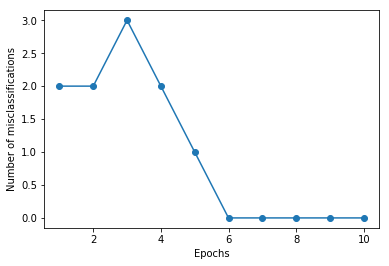

In [65]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

Lets now define a way of plotting the decision regions from any algorithm.

In [66]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

Plot the training data and the regions which are produced in the Perceptron

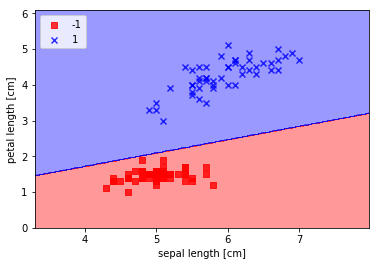

In [67]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Lets now define a ADAptive LInear NEuron classifier,
you can find more info at https://en.wikipedia.org/wiki/ADALINE

In [68]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

Lets now, in a slightly different way train our algorithm and check the errors as depending on the epochs. 
Does the learning rate have an effect?

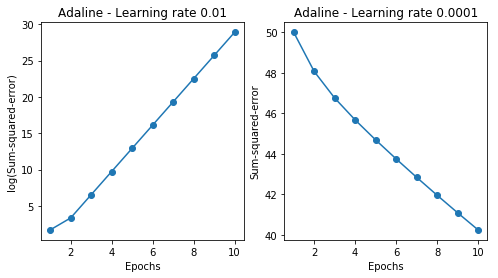

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

Let us now rerun the same thing as we did for the Perceptron and visualise our regions

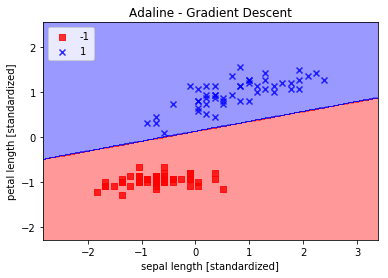

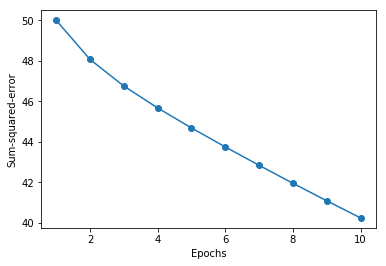

In [78]:
#ada = AdalineGD(n_iter=15, eta=0.01)
ada =AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()